# Fitting your K2 Decay Traces

In this notebook you will go through how to fit a decay trace from the K2 experiment and extract Kobs from your data.

# Starting Steps

The first thing to do is import both your data and the necessary coding libraries.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#these are the necessary libraries for model fitting

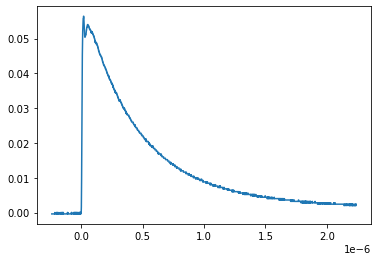

In [56]:
#to add data, the data must first be added to your jupyterhub, preferably in either a txt or csv file. 
data=np.loadtxt("K2Data0000.CSV", delimiter=',', usecols=(3,4), skiprows=(18))
#i am importing data from a previously done K2 experiment. 
#Note that both the delimiter, columns you want imported, and number of rows to skip must be included
plt.plot(data[:,0],data[:,1]) #this will plot your data


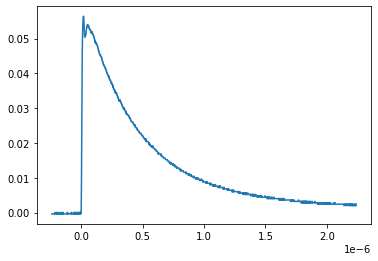

In [57]:
raw_time, raw_voltage  = np.loadtxt("K2Data0000.CSV", delimiter=',', unpack = True, skiprows=19, usecols=(3,4))
plt.plot(raw_time,raw_voltage) #this creates two seperate arrays, one for voltage and one for time. this will come in handy later.

# Important Note

In the data file, you will notice five columns, where only column 4 and 5 hold data. I have told python to import columns 3 and 4. Why? This is because Python uses 0 indexing, which means you start counting at 0 instead of at 1. 

# Horizontal Trimming

These next cells trim the data so that the model fit will only be applied to the actual decay trace, and not the entire set of data. 

My array is 2481 points long. I'm going to try to trim off the first 350 points.


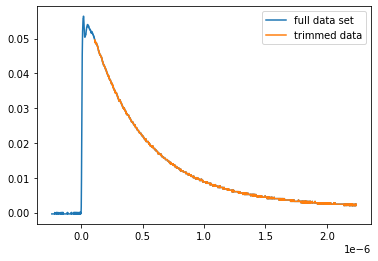

In [58]:
index = 350 # I can use the same variable name here since it's just used in this cell anyway.
print(f"My array is {len(raw_voltage)} points long. I'm going to try to trim off the first {index} points.")
plt.plot(raw_time, raw_voltage, label = "full data set")
plt.plot(raw_time[index:], raw_voltage[index:], label = "trimmed data")
plt.legend()

#These two lines slice out the selected portion of the array and give them new names
# for use in the rest of the notebook.
time = raw_time[index:]
voltage = raw_voltage[index:]

# Fitting the data to an Exponential

All of the data for the K2 experiment will need to be fitted to an exponential model. This allows us to calculate for Kobs as one of our parameters. 

y = a*exp(-x*k) + b

Where a, k, and b are your parameters. a and b are arbitrary variable names, but k is named specifically because in this set up, the parameter k will be equal to the rate constant (Kobs)

In [59]:
def exponential(x, a, k, b):
    ''' Returns y = a exp(-x*k) + b for any data set x sent to the function'''
    return a*np.exp(-x*k) + b

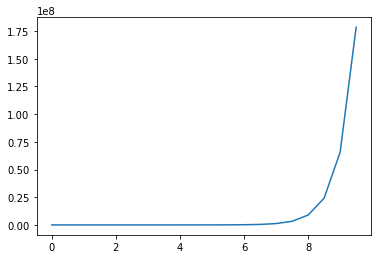

In [60]:
thing1 = np.arange(0,10,.5) #this makes an array going from 0 to 10 in steps of 0.5. linspace() is similar and also good to know
thing2 = exponential(thing1, 1, -2, 3)
plt.plot(thing1,thing2)

This fit clearly does not match our data, however this makes sense because we chose arbitray parameter values for a, k, and b. 

Now, we need to come up with closer values for a, k, and b to make it easier for curve_fit to do it's job. 

A = .1, because the y-intercept is a bit above 0.08 in my plot above

k = 2000000 because this is similar to a rate constant value

b = 0, because the data flatlines at about 0 at long time.

In [61]:
popt_first, pcov_first = curve_fit(exponential, time, voltage, p0=(.05, 2000000, 0))
print(f"The value for a is {popt_first[0]}. The value for k is {popt_first[1]}. The value for b is {popt_first[2]}")

The value for a is 0.06017906912471755. The value for k is 2192821.5083886036. The value for b is 0.0020111147341115507


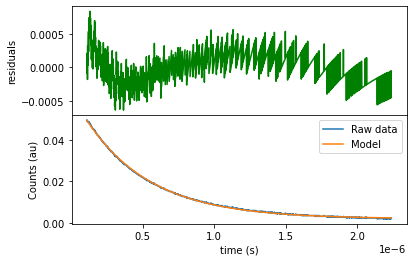

In [62]:
plt.subplot(211)
plt.plot(time, voltage-exponential(time, popt_first[0],popt_first[1], popt_first[2]),'g')
plt.ylabel("residuals")
plt.subplot(212, sharex=plt.gca())
plt.plot(time,voltage)
plt.plot(time, exponential(time, popt_first[0],popt_first[1], popt_first[2]))
plt.legend(("Raw data", "Model"))
plt.ylabel("Counts (au)")
plt.xlabel("time (s)")
plt.subplots_adjust(hspace=0)
#we are now plotting both the residuals and the raw data vs the model to see if our fit is accurate. 

# Final Step

Now, you have successfully trimmed and fit your data, and have accurate parameters. Now, we can plot the model fit against the original data, and print out the parameters once more so everything is in one spot. 

The value for a is 0.06017906912471755. The value for k is 2192821.5083886036. The value for b is 0.0020111147341115507


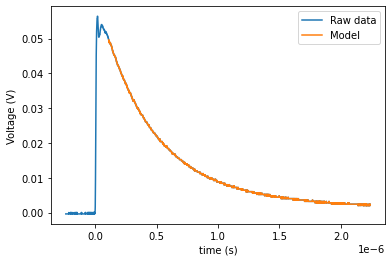

In [63]:
plt.plot(raw_time, raw_voltage, label = "full raw data set")
plt.plot(time, voltage, label = "trimmed data")
plt.legend(("Raw data", "Model"))
plt.ylabel("Voltage (V)")
plt.xlabel("time (s)")

print(f"The value for a is {popt_first[0]}. The value for k is {popt_first[1]}. The value for b is {popt_first[2]}")